###                                <font color='orange'> Health Data Challenge </font>
#### ASHISH SHARMA 
Email: hello@sharma-ashish.com <br/>
GitHub: https://github.com/ashish1993utd <br/>
LinkedIn: https://www.linkedin.com/in/ashishsharma1993/ <br/>
Portfolio: www.sharma-ashish.com


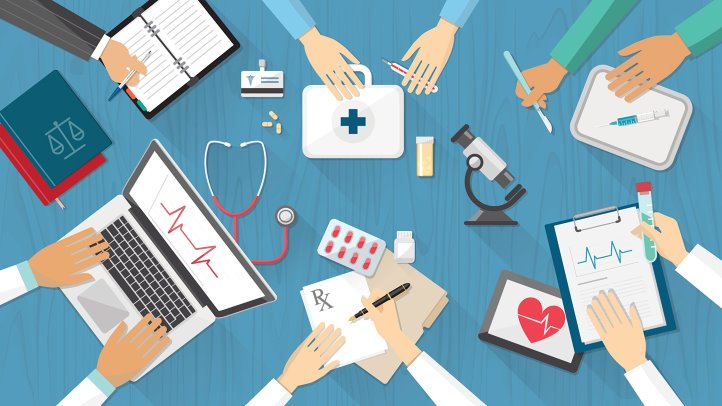

In [1]:
## Importing all the required libraries for analysis
#Loading required libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

## Libraries for Modeling 
plt.style.use('seaborn') #set same style for all plots
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import statsmodels.api as stat_model
from sklearn.model_selection import GridSearchCV
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.metrics import f1_score, precision_score, confusion_matrix,recall_score, precision_recall_curve, auc, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from scipy.stats import skew
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings('ignore')


## 1. Data Import


In [2]:
#Loading the test and train datasets
data_train = pd.read_csv(r'C:\Users\nick2\Desktop\MS\challengetraining_data.csv')
data_test = pd.read_csv(r'C:\Users\nick2\Desktop\MS\challengetest_data.csv')

In [3]:
#Checking the shapes of both the datasets
data_train.shape, data_test.shape

((81414, 50), (20352, 49))

In [4]:
#Having a look at the columns
data_train.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
data_test.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [6]:
# Having a look at the dataset
data_train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,N
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,N
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,N
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,N
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,N


## 2. Data Preparation

<br/>
It is always advisable to have clean and processed data for modelling purposes. This is done in the following steps:
1. Carry out null value treatment of the data
2. We carry out EDA to find the highly correlated variables, analyse the trend and distribution of the data
3. Subset the columns based on the EDA carried out
4. Creating seperate test and train dataset
5. Carrying out scaling of the data(if required)

### The approach towards cleaning the data:
####  1. Data Validity/Quality: 
i. Check if important columns (Based on business knowledge) are available completely with no major missing values. <br/><br/>
ii. Check for the Null values in all the columns. <br/><br/>
iii. It is advisable to delete the columns with more then 60-70% of missing data. But sometimes it might happen that an important variable is having more than 60% of missing data. 
                                                           In that case we can use different imputation techniques which I will mention below<br/><br/>
      iv. Check if the column is having correct data. Suppose for example a column is for age in years, and it consists of negative values or very small values say 1 year or very large values 200 years. I would handle this kind of data first.
  
####  2. Handling missing values:
<br/>
First I will identify if the missing value is:<br/>
a) Missing Completely at random (MCAR): In essence, if we split the data into two more sets. Data missing and Data present. Then check whether the distribution of the variables in each of these sets is the same<br/><br/>
b) Missing at random (MAR) <br/><br/>
c) Missing not at random (RNAR) or Not missing at random (NMAR)<br/><br/>

In the first two cases, it is safe to remove the missing data depending upon their occurrences (delete if >60% missing values). While in the third case removing observations with missing values can produce a bias in the model
      
##### Methods:
i. Dropping Variables: When the variable has more than 60% of missing data then it is always better to drop the variable, if the variable is insignificant. Otherwise imputation (which we will discuss later) is always a better option than dropping the variable.<br/><br/>
ii.Unconditional Imputation: (Mean, Median, Mode)<br/>

- Mean, Median: when the missing data is around 10%-20% in a particular colummn and I really want to start working on the modeling part then I would use mean/median imputation because it is fast and the most basic type of imputation. One major disadvantage is that mean imputation reduces variance in the dataset <br/><br/>
- Mode: I will use mode imputation for categorical variables in the dataset. 
<br/> The major limitation of using this methods is that it leads to biased estimates of the variances and covariance. The standard errors and test statistics can also be underestimated and overestimated respectively.This imputation technique works well with when the values are missing completely at random <br/><br/>

iii. Predictive Models: I feel this is the best type of imputation. I mostly use predictive model imputation when time is not the constraint. I would have divided our data set into two sets: One set with no missing values for the variable (training) and another one with missing values (test) and then use methods like logistic regression and ANOVA for prediction
       
####  3. Encoding:
After the imputation is performed I would have then performed encoding. There are basically 3 types of encoding I use. <br/>
        i. Label Encoding: Suppose a categorical variables have 3 types of values then replace those with numberical values of 1,2,3<br/><br/>
        ii. Binary Encoding: Suppose a categorical variable is having 2 types of values then replace those with 0,1 (e.g. categorical variables having values such as yes, no or male, female etc.)<br/><br/>
        iii. One hot encoding: It is a standard approach which is used widely. <br/><br/>

In [7]:
#Checking for any null values in the train dataset
np.sum(data_train.isnull())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

#### Checking for unique values in each column and see which all symbols denote the missing values in each of the columns
- There are no null values in any of the columns in train data,  but there are missing values
- I would want to see unique values for each column and see if missing values are represented by any other symbol apart from '?'


In [8]:
# Creating a copy of training data set for data preprocessing, so that even if I manipulate this data now,the original data remains intact
train = data_train.copy()

# looping through each column to get its unique values
for column_name in train.columns:
    print('Column {} has {} unique values'.format(column_name,train[column_name].unique()))

Column encounter_id has [  2278392    149190     64410 ... 443854148 443857166 443867222] unique values
Column patient_nbr has [  8222157  55629189  86047875 ... 120975314 100162476 175429310] unique values
Column race has ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] unique values
Column gender has ['Female' 'Male' 'Unknown/Invalid'] unique values
Column age has ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] unique values
Column weight has ['?' '[75-100)' '[50-75)' '[100-125)' '[0-25)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] unique values
Column admission_type_id has [6 1 2 3 4 5 8 7] unique values
Column discharge_disposition_id has [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23 15 20  9 24 28
 19 27] unique values
Column admission_source_id has [ 1  7  2  4  5  6 20  3 17  8  9 10 22 14 11 25 13] unique values
Column time_in_hospital has [ 1  3  2  4  5 13  9  7 10 12  6  8 14 11] uniq

Column chlorpropamide has ['No' 'Steady' 'Down' 'Up'] unique values
Column glimepiride has ['No' 'Steady' 'Down' 'Up'] unique values
Column acetohexamide has ['No' 'Steady'] unique values
Column glipizide has ['No' 'Steady' 'Up' 'Down'] unique values
Column glyburide has ['No' 'Steady' 'Up' 'Down'] unique values
Column tolbutamide has ['No' 'Steady'] unique values
Column pioglitazone has ['No' 'Steady' 'Down' 'Up'] unique values
Column rosiglitazone has ['No' 'Steady' 'Up' 'Down'] unique values
Column acarbose has ['No' 'Steady' 'Up' 'Down'] unique values
Column miglitol has ['No' 'Steady' 'Down' 'Up'] unique values
Column troglitazone has ['No' 'Steady'] unique values
Column tolazamide has ['No' 'Steady'] unique values
Column examide has ['No'] unique values
Column citoglipton has ['No'] unique values
Column insulin has ['No' 'Up' 'Steady' 'Down'] unique values
Column glyburide-metformin has ['No' 'Steady' 'Down' 'Up'] unique values
Column glipizide-metformin has ['No' 'Steady'] uniqu

#### Finding missing values 

- I can see missing values are denoted by '?' in most of the columns of the dataset
- Column 'gender' has missing values denoted by 'Unknown/Invalid'
- My next step would be to find the count of missing values in each of the columns
- Once I have count of missing values for each column, I will take a call whether to drop these, or impute these or maybe remove these columns from analysis depending on the percentage of missing values as I have a limited amount of time to make the predictive models

In [9]:
# Creating a function that returns the sum of missing values for a column of a dataset
def check_missing_values(dataset,column_name):
    x=np.sum(dataset[column_name]=='?')
    return x    

# Checking for number of missing values in each column of train dataset, and printing the columns which have missing values 
# along with number of missing values 
for column_name in train.columns:
    if check_missing_values(train,column_name)>0:
        print('{} has {} missing values'.format(column_name,check_missing_values(train,column_name)))

# Finding missing values in gender column
print('Gender has {} missing values in total'.format(np.sum(train['gender']=='Unknown/Invalid')))

race has 1813 missing values
weight has 78844 missing values
payer_code has 32231 missing values
medical_specialty has 39935 missing values
diag_1 has 18 missing values
diag_2 has 288 missing values
diag_3 has 1125 missing values
Gender has 2 missing values in total


#### Handling missing values by dropping columns and records
1. Weight has around 97% of the values missing. I cannot impute this column as I would not want to introduce the bias to the data even if it is an important column (which I don't know as I don't have enough information about the data) for predicting the target variable. So it is better to drop this column from the analysis
2. Medical_speciality has around 49% missing values, again this column doesn't have half of the data available, so I would drop it as well. Same is the case with payer code with around 40% of the missing values, I feel it is better to keep it out from the analysis as well.
3. diag_1, diag_2 and diag_3 seems to be a diagnosis to me. Though the missing values are very less, but if all three are missing then it's a bad data for me, whose interpretability and predictability will be very less. So if all three are missing, I will drop those records.
4. Gender has only 2 missing values, so I will just drop that straight away, dropping 2 records is not going to take away much from the data
5. Other thing I notice here is that columns named 'citoglipton' and 'examide' have same value for all the records, which is 'No'. That means these columns will not help in explaining any variance in the data, so it is better to drop them as well 

In [10]:
# Dropping columns 'weight','payer_code', and 'medical_specialty'
train=train.drop(columns=['weight','payer_code','medical_specialty','citoglipton', 'examide'],axis=1)

# Dropping missing values from gender column
train=train[train['gender']!='Unknown/Invalid']

# Dropping rows where diag_1, diag_2 and diag_3 all are missing
drop_index = train[(train['diag_1'] == '?') & (train['diag_2'] == '?') & (train['diag_3'] == '?')].index
train.drop(drop_index, inplace=True)


#### Handling missing values by imputation
- Dropping the missing values has been done
- Next I will impute rest of the columns with missing values, and because these columns are categorical diag_1, diag_2, diag_3 and race, so I am going to replace the missing values present in each of the them with the mode of each column respectively.

In [11]:
# Replacing all missing values my NAN, so that I can impute them easily
train=train.replace('?',np.NaN)

# Replacing null values from each of the columns diag_1, diag_2, diag_3, and race with the mode of each column
for column in ['diag_1', 'diag_2', 'diag_3','race']:
    train[column].fillna(train[column].mode()[0], inplace=True)

    

### Feature Engineering

- I would also like to spend some time on the feature engineering. There are a lot of categorical features and do input those into model by creating dummies will not only be computationally inefficient but will also reduce the predictive power of the model because of too many indicator variables
- It is better to combine these features if possible and reduce the dimensionality of the data set.
- Next Steps would be
 1. The dataset contains 23 features for 23 different drugs which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. I have decided to count how many changes were made in total for each patient, and make it into a new feature. The reason behind engineering this feature is both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.
<br/>
  2. Another possibly related factor could be the total number of medications used by the patient (which may indicate severity of their condition). I will create another feature by counting the medications used during the encounter. But before that I need to map the categorical values for each of the 23 drugs into numerical values
  3. The dataset contains diag_1, diag_2, diag_3 for a given patient. However, each of these have 100's of unique codes and it is extremely difficult to include them in the model and interpret meaningfully. And Due to time constraint, I am going to drop these as well. Otherwise I would have thought of combining them in some way to reduce the number of unique values in each of the columns
  4. Age column gives us age as 10 year categories, so I don’t know the exact age of each patient. I want to be able to see the effect of increasing age on readmission, even if in a crude way. To do that, I assume that age of the patient on average lies at the midpoint of the age category. For example, if the patient’s age category is 20–30 years, then I assume the age = 25 years. 
  5. Some patients in the dataset had more than one encounter. I can't take them as independent encounters because that bias the results towards those patients who had multiple encounters. I have decided to use first encounters of patients with multiple encounters.
  6. encounter_id, patient_nbr are just the serial numbers for the records given, they don't have any predictive power so I will drop these columns.

In [12]:
# Keys represent 23 different drugs
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
        'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
        'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
        'metformin-pioglitazone']

# creating new column as per step 1 above
for col in keys:
    colname = str(col) + 'temp'
    train[colname] = train[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

train['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    train['numchange'] = train['numchange'] + train[colname]
    del train[colname]
    
# Converting categorical values in all the 23 drugs columns into numerical, I have encoded No as 0 and rest of the values 
# as 1
for col in keys:
    train[col] = train[col].replace('No', 0)
    train[col] = train[col].replace('Steady', 1)
    train[col] = train[col].replace('Up', 1)
    train[col] = train[col].replace('Down', 1) 

# Creating new column as per step 2 above
train['nummed'] = 0
for col in keys:
    train['nummed'] = train['nummed'] + train[col]
    
# Using One-hot encoding for change, gender and diabetesMed columns     
train['change'] = train['change'].replace('Ch', 1)
train['change'] = train['change'].replace('No', 0)
train['gender'] = train['gender'].replace('Male', 1)
train['gender'] = train['gender'].replace('Female', 0)
train['diabetesMed'] = train['diabetesMed'].replace('Yes', 1)
train['diabetesMed'] = train['diabetesMed'].replace('No', 0)

# Dropping duplicate encounters of patients
train = train.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

#Dropping diag_1, diag_2 and diga_3 columns from training data due to time constraint
train.drop(columns=['diag_1','diag_2','diag_3','encounter_id','patient_nbr'],axis=1, inplace=True)

# Mapping age as dscribed in step-4
age_dict = {'[0-10)':5,'[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45,'[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85,'[90-100)':95}
train['age'] = train.age.map(age_dict)
train['age'] = train['age'].astype('int64')

# Mapping the target variable to numerical values
train['readmitted'] = train['readmitted'].map({'Y':1,'N':0})

# Reducing A1Cresult and max_glu_serum to categories Normal, abnormal and not_tested
train['A1Cresult'] = train['A1Cresult'].map({'None':-99,'>7':1, '>8':1, 'Norm':0})
train['max_glu_serum'] = train['max_glu_serum'].map({'None':-99,'>300':1,'>200':1,'Norm':0 })


In [13]:
train.describe()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,nummed
count,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,...,60054.000000,60054.000000,60054.0,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000
mean,0.467329,65.759816,2.088337,3.597595,5.660839,4.309222,43.146968,1.417757,15.756802,0.286908,...,0.006944,0.000083,0.0,0.000033,0.000017,0.450012,0.761981,0.090618,0.265728,1.185650
std,0.498936,15.923040,1.499618,5.246654,4.139110,2.955545,19.902521,1.754149,8.278616,1.063004,...,0.083040,0.009124,0.0,0.005771,0.004081,0.497499,0.425874,0.287068,0.477344,0.939454
min,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,65.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,14.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,75.000000,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,1.000000,95.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000


In [14]:
# Mean of almost all the drugs columns is almost 0. That means it provided a very granular detail, so I will drop these 
# columns except for metformin, glipizide, glyburide, and insulin, whose mean is above zero and provide some predictive
# power to my model
drop_cols = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'tolbutamide', 'pioglitazone', 
             'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
        'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
        'metformin-pioglitazone']
train.drop(columns=drop_cols, inplace=True, axis=1)


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60054 entries, 0 to 81413
Data columns (total 25 columns):
race                        60054 non-null object
gender                      60054 non-null int64
age                         60054 non-null int64
admission_type_id           60054 non-null int64
discharge_disposition_id    60054 non-null int64
admission_source_id         60054 non-null int64
time_in_hospital            60054 non-null int64
num_lab_procedures          60054 non-null int64
num_procedures              60054 non-null int64
num_medications             60054 non-null int64
number_outpatient           60054 non-null int64
number_emergency            60054 non-null int64
number_inpatient            60054 non-null int64
number_diagnoses            60054 non-null int64
max_glu_serum               60054 non-null int64
A1Cresult                   60054 non-null int64
metformin                   60054 non-null int64
glipizide                   60054 non-null int64
glyburid

In [16]:
pd.set_option('display.max_columns', 500)
train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted,numchange,nummed
0,Caucasian,0,5,6,25,1,1,41,0,1,0,0,0,1,-99,-99,0,0,0,0,0,0,0,0,0
1,Caucasian,0,15,1,1,7,3,59,0,18,0,0,0,9,-99,-99,0,0,0,1,1,1,0,1,1
2,AfricanAmerican,0,25,1,1,7,2,11,5,13,2,0,1,6,-99,-99,0,1,0,0,0,1,0,0,1
3,Caucasian,1,35,1,1,7,2,44,1,16,0,0,0,7,-99,-99,0,0,0,1,1,1,0,1,1
4,Caucasian,1,45,1,1,7,1,51,0,8,0,0,0,5,-99,-99,0,1,0,1,1,1,0,0,2


In [17]:
# Create dummies for categorical columns race, admission_type_id, discharge_disposition_id, and admission_source_id
race_dummy = pd.get_dummies(train['race'],prefix='race')
admission_type_dummy = pd.get_dummies(train['admission_type_id'],prefix='admission_type')
discharge_disposition_dummy = pd.get_dummies(train['discharge_disposition_id'],prefix='discharge')
admission_source_dummy = pd.get_dummies(train['admission_source_id'],prefix='admission_source')

# Adding the dummies to the train data
train = pd.concat([train, race_dummy,admission_type_dummy,discharge_disposition_dummy,admission_source_dummy], axis = 1)

# Dropping the original columns
train.drop(columns=['race', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id'], axis = 1, inplace=True)

### Checking for skewness
- Checking if features have skewness and have high kurtosis. As a reference, the skew of a normal distribution is 0 and the excess kurtosis (difference of actual kurtosis from ideal normal distribution value of 3), as returned by the kurtosis() function for a normal distribution is 0, which would impact standardization.

In [18]:
num_col = ['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col

skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = train[i].skew()
    skew_before.append(skewval)
    
    kurtval = train[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = train[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(train[train[i] == 0])/len(train) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(train[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(train[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(train[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(train[train[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(train[train[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(train[train[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [19]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,age,-0.641472,0.364245,15.923040,No,NA,-0.641472,0.364245,15.923040
1,time_in_hospital,1.169683,0.968049,2.955545,No,NA,1.169683,0.968049,2.955545
2,num_lab_procedures,-0.221417,-0.284761,19.902521,No,NA,-0.221417,-0.284761,19.902521
3,num_procedures,1.233743,0.575911,1.754149,No,NA,1.233743,0.575911,1.754149
4,num_medications,1.404333,3.701551,8.278616,No,NA,1.404333,3.701551,8.278616
5,number_outpatient,8.842402,153.841634,1.063004,Yes,log1p,3.097406,10.186095,0.384131
6,number_emergency,21.522120,1213.554266,0.530131,Yes,log1p,4.129492,20.112284,0.235502
7,number_inpatient,4.948369,38.553834,0.656524,Yes,log1p,2.627599,6.907326,0.325715
8,number_diagnoses,-0.760301,-0.339558,1.985009,No,NA,-0.760301,-0.339558,1.985009


- Three columns need to be transformed. I will perform log transformation where a skew or kurtosis beyond the limits of -2 ≤ skew and kurtosis ≤ 2. Also, since log (0) is not defined, we decided to use the following rule:
- Compute log(x) for any feature x if percentage of 0s in x ≤ 2%, after removing the zeros. This ensures that I don’t bulk-remove records that hold predictive power for other columns.Compute log1p(x) otherwise (log1p(x) means log(x+1), while retaining the zeros.

In [20]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            train = train[train[colname] > 0]
            train[colname + "_log"] = np.log(train[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            train = train[train[colname] >= 0]
            train[colname + "_log1p"] = np.log1p(train[colname])

# Now that I have included the transformed columns in my dataset, I will drop the original columns that needed the transfomration
train = train.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

### Removing Outliers
- Anything within 3 Standard Deviations on either side of the mean would include 99.7% of our data and the remaining 0.3% we treat as outliers. Using this logic, I restricted the data to within 3 Standard deviations on either side from the mean for each numeric column

In [21]:
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses']
train = train[(np.abs(sp.stats.zscore(train[num_cols])) < 3).all(axis=1)]

### Exploratory Data Aanalysis


- <font color='green'> Checking for distribution of numerical columns </font>

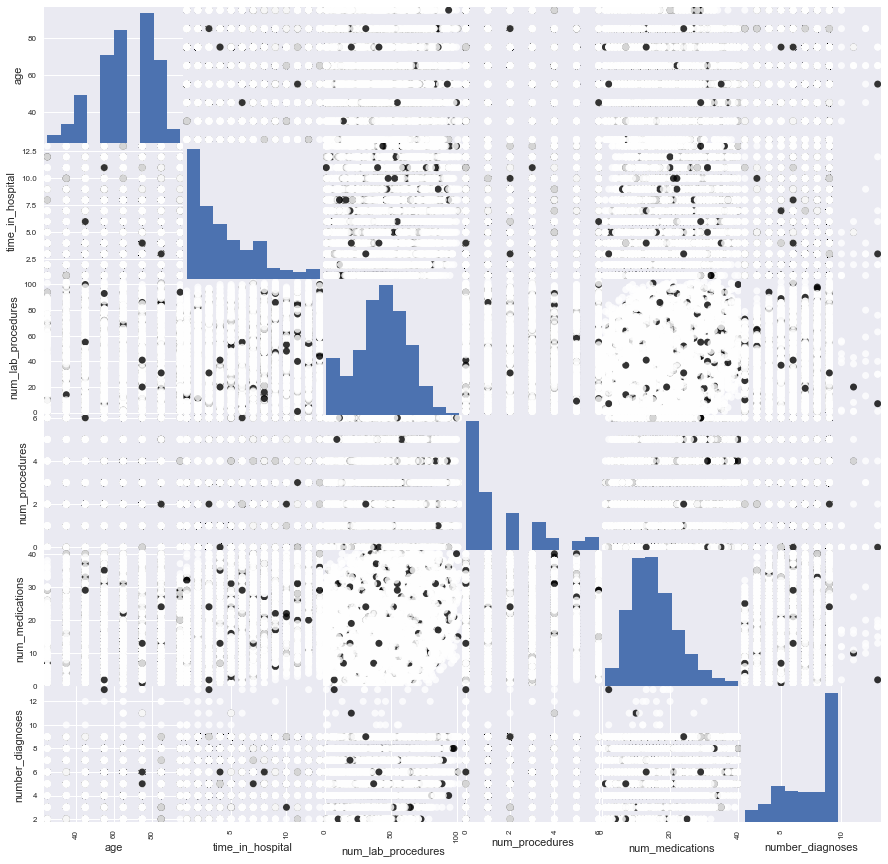

In [22]:
attributes=num_cols
scatter_matrix(train[attributes], figsize = (15,15), c = train.readmitted ,alpha = 0.8, marker = 'O')
plt.show()

- <font color='green'> Looking for correlation between numerical columns </font>

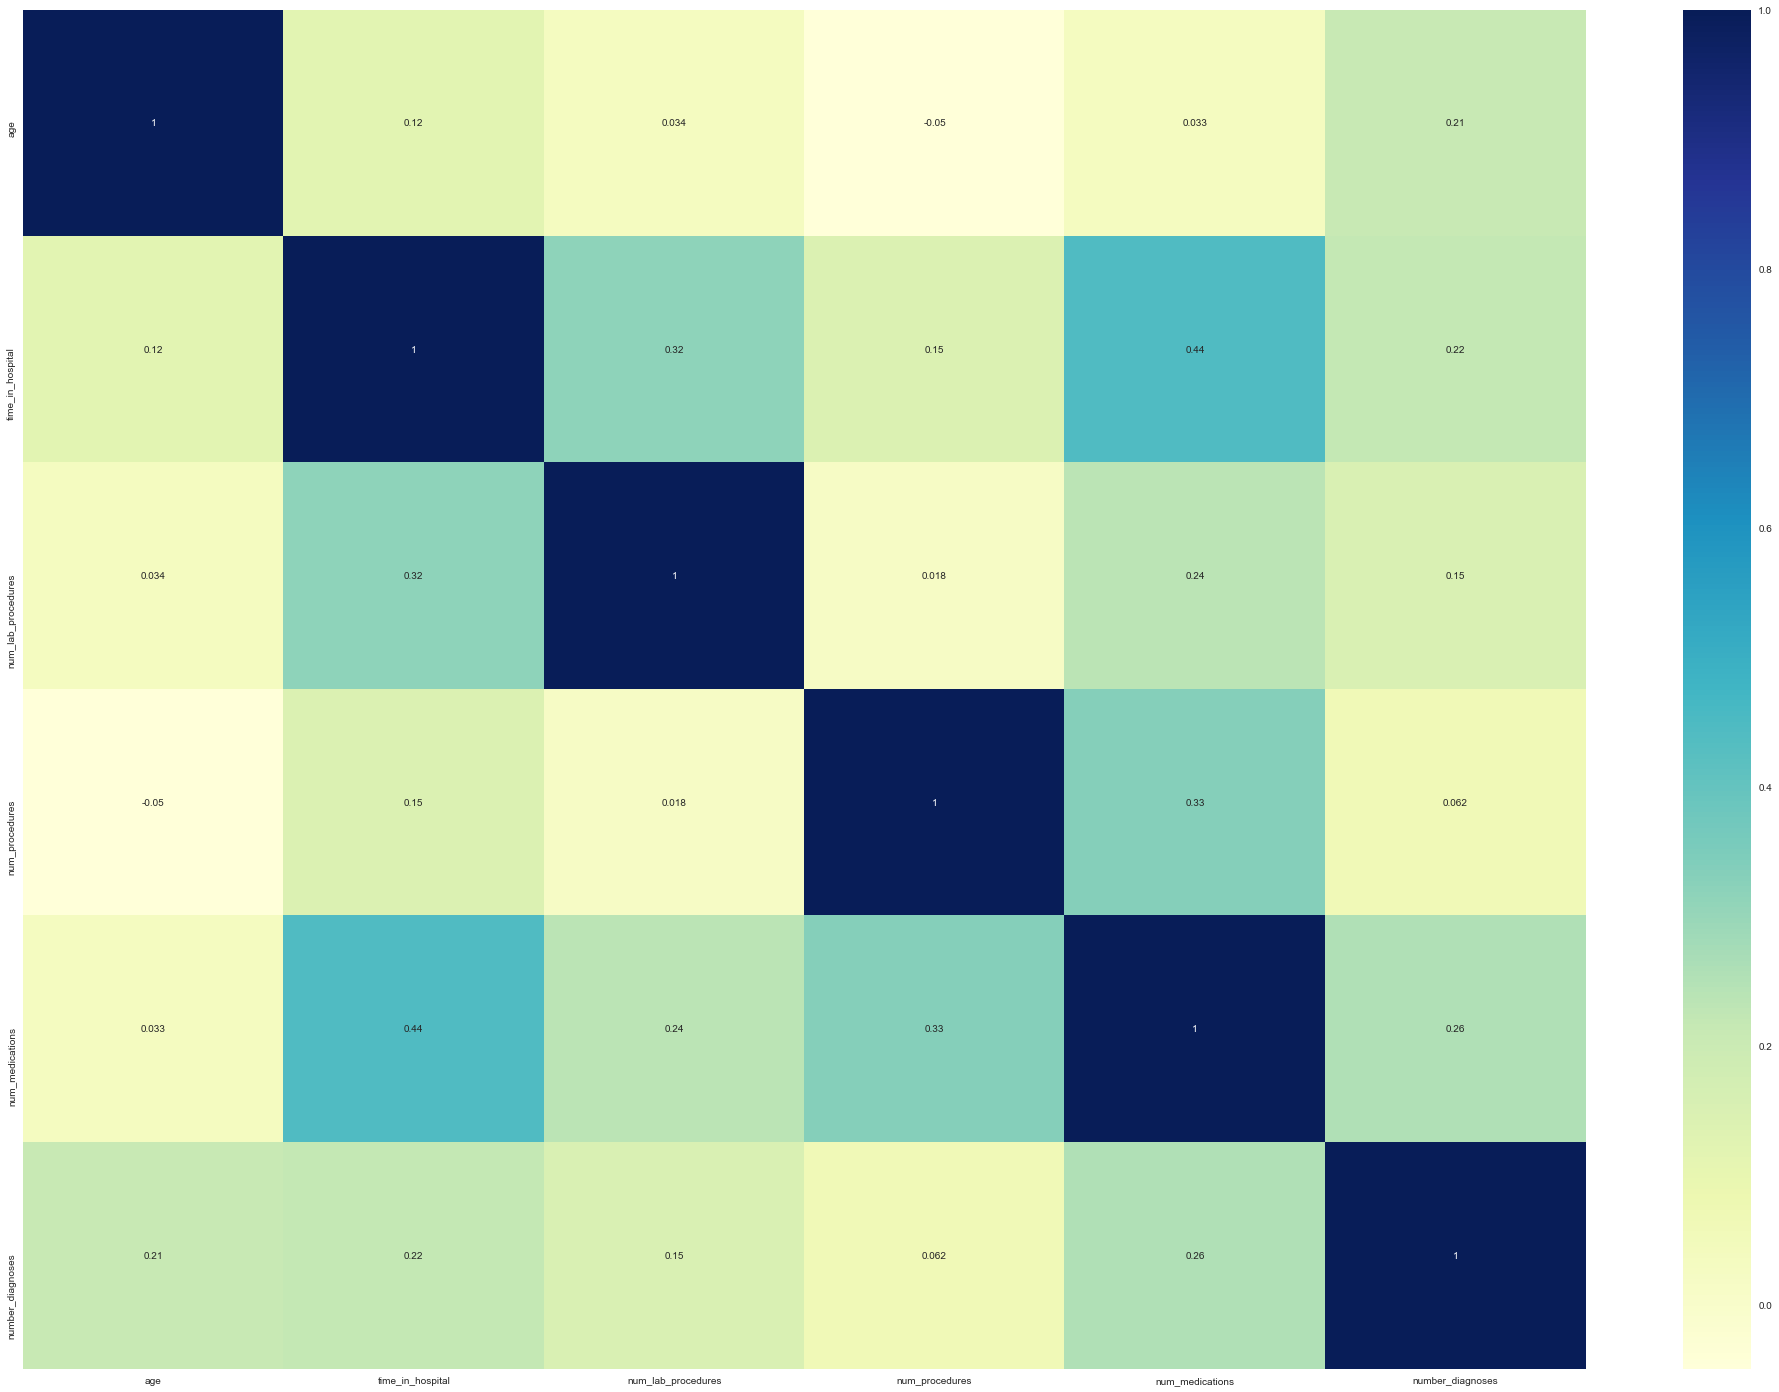

In [23]:
plt.figure(figsize=(35,25)) 
sns.heatmap(train[attributes].corr(), annot=True, cmap="YlGnBu") 
plt.show()

- <font color='green'> Plotting Pairplots of each of the numerical columns </font>

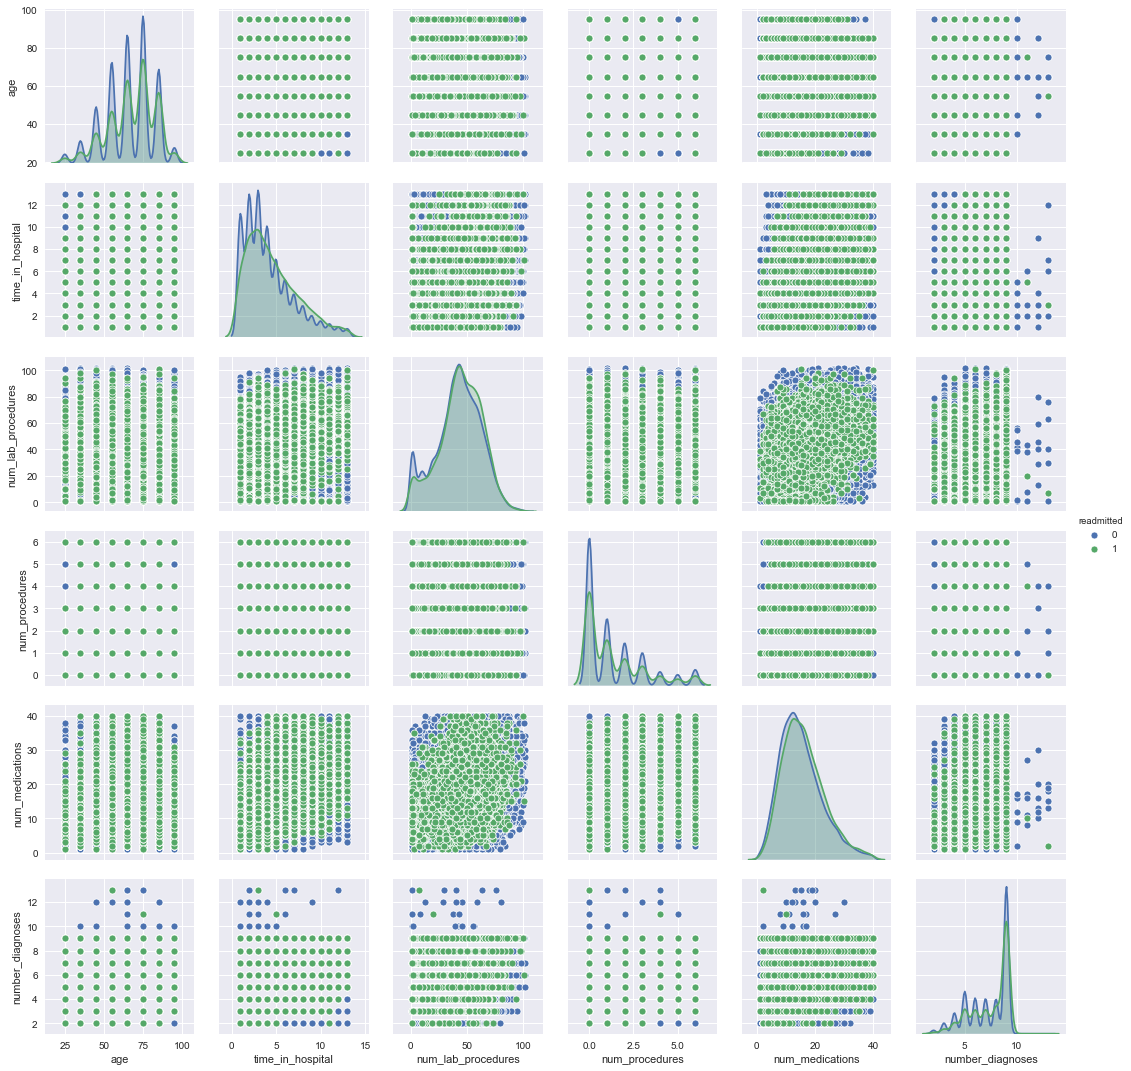

In [24]:
sns.pairplot(train, hue = 'readmitted', vars = num_cols)

- <font color='green'> Plotting the box plots of numerical columns to see if there are outliers that still need to be handled </font>

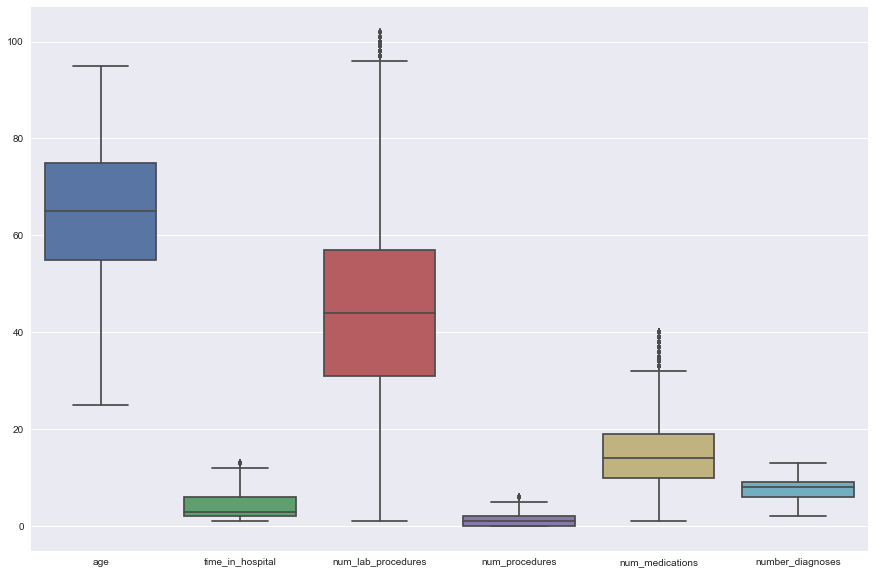

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(data = train[num_cols])

- <font color='green'>Let's check the distribution of target variable in the data</font>

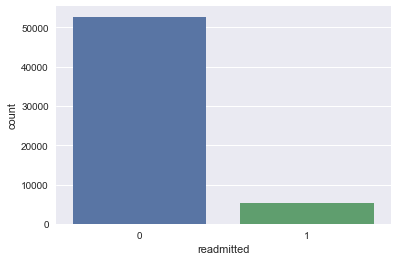

In [26]:
sns.countplot(train['readmitted'], label = "Count") 

In [27]:
train['readmitted'].value_counts()

0    52719
1     5266
Name: readmitted, dtype: int64

<font color ='blue'> #### Need to balance out the data as it is highly imbalanced but before that I am going to preprocess the test data as well</font>

## Test Data Preprocessing
- Before we jump into modelling, I would like to preprocess the test data, the same way I did for train data to ensure I have same number of features and scaling for test data as well

In [61]:
# Creating a copy of test data set for data preprocessing, so that even if I manipulate this data now,the original data remains intact
test = data_test.copy()

# looping through each column to get its unique values
for column_name in test.columns:
    print('Column {} has {} unique values'.format(column_name,test[column_name].unique()))

Column encounter_id has [    15738     62256    150006 ... 443842016 443842778 443847176] unique values
Column patient_nbr has [ 63555939  49726791  22864131 ... 184875899 183087545  86472243] unique values
Column race has ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Hispanic' 'Asian'] unique values
Column gender has ['Female' 'Male' 'Unknown/Invalid'] unique values
Column age has ['[90-100)' '[60-70)' '[50-60)' '[80-90)' '[70-80)' '[40-50)' '[30-40)'
 '[10-20)' '[20-30)' '[0-10)'] unique values
Column weight has ['?' '[50-75)' '[0-25)' '[75-100)' '[25-50)' '[100-125)' '[125-150)'
 '[150-175)' '[175-200)' '>200'] unique values
Column admission_type_id has [3 2 1 6 5 8 4 7] unique values
Column discharge_disposition_id has [ 3  1  6  2 25  5 11  7  4 10  8 14 18 17  9 22 13 23 20 28 15 27 19 24] unique values
Column admission_source_id has [ 4  2  1  7 20 17  6  5  3  8  9 14 22] unique values
Column time_in_hospital has [12  1  2 11  6  3 13  4  5  9 10  8  7 14] unique values
Column pa

In [62]:
# Checking for number of missing values in each column of test dataset, and printing the columns which have missing values 
# along with number of missing values 
for column_name in test.columns:
    if check_missing_values(test,column_name)>0:
        print('{} has {} missing values'.format(column_name,check_missing_values(test,column_name)))

# Finding missing values in gender column
print('Gender has {} missing values in total'.format(np.sum(test['gender']=='Unknown/Invalid')))

race has 460 missing values
weight has 19725 missing values
payer_code has 8025 missing values
medical_specialty has 10014 missing values
diag_1 has 3 missing values
diag_2 has 70 missing values
diag_3 has 298 missing values
Gender has 1 missing values in total


In [63]:
# Dropping columns 'weight','payer_code', and 'medical_specialty'
test=test.drop(columns=['weight','payer_code','medical_specialty','citoglipton', 'examide'],axis=1)

# Dropping missing values from gender column
test=test[test['gender']!='Unknown/Invalid']

# Dropping rows where diag_1, diag_2 and diag_3 all are missing
drop_index = test[(test['diag_1'] == '?') & (test['diag_2'] == '?') & (test['diag_3'] == '?')].index
test.drop(drop_index, inplace=True)

# Replacing all missing values my NAN, so that I can impute them easily
test=test.replace('?',np.NaN)

# Replacing null values from each of the columns diag_1, diag_2, diag_3, and race with the mode of each column
for column in ['diag_1', 'diag_2', 'diag_3','race']:
    test[column].fillna(test[column].mode()[0], inplace=True)


# creating new column as created in train data
for col in keys:
    colname = str(col) + 'temp'
    test[colname] = test[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

test['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    test['numchange'] = test['numchange'] + test[colname]
    del test[colname]
    
# Converting categorical values in all the 23 drugs columns into numerical, I have encoded No as 0 and rest of the values 
# as 1
for col in keys:
    test[col] = test[col].replace('No', 0)
    test[col] = test[col].replace('Steady', 1)
    test[col] = test[col].replace('Up', 1)
    test[col] = test[col].replace('Down', 1) 

# Creating new column as created in training set
test['nummed'] = 0
for col in keys:
    test['nummed'] = test['nummed'] + test[col]
    
# Using One-hot encoding for change, gender and diabetesMed columns     
test['change'] = test['change'].replace('Ch', 1)
test['change'] = test['change'].replace('No', 0)
test['gender'] = test['gender'].replace('Male', 1)
test['gender'] = test['gender'].replace('Female', 0)
test['diabetesMed'] = test['diabetesMed'].replace('Yes', 1)
test['diabetesMed'] = test['diabetesMed'].replace('No', 0)

# Dropping duplicate encounters of patients
test = test.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

#Dropping diag_1, diag_2 and diga_3 columns from test
test.drop(columns=['diag_1','diag_2','diag_3','encounter_id','patient_nbr'],axis=1, inplace=True)

# Mapping age as dscribed in step-4
age_dict = {'[0-10)':5,'[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45,'[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85,'[90-100)':95}
test['age'] = test.age.map(age_dict)
test['age'] = test['age'].astype('int64')

# Reducing A1Cresult and max_glu_serum to categories Normal, abnormal and not_tested
test['A1Cresult'] = test['A1Cresult'].map({'None':-99,'>7':1, '>8':1, 'Norm':0})
test['max_glu_serum'] = test['max_glu_serum'].map({'None':-99,'>300':1,'>200':1,'Norm':0 })

# Mean of almost all the drugs columns is almost 0. That means it provided a very granular detail, so I will drop these 
# columns except for metformin, glipizide, glyburide, and insulin, whose mean is above zero and provide some predictive
# power to my model
drop_cols = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'tolbutamide', 'pioglitazone', 
             'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
        'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
        'metformin-pioglitazone']
test.drop(columns=drop_cols, inplace=True, axis=1)

# Create dummies for categorical columns race, admission_type_id, discharge_disposition_id, and admission_source_id
race_dummy = pd.get_dummies(test['race'],prefix='race')
admission_type_dummy = pd.get_dummies(test['admission_type_id'],prefix='admission_type')
discharge_disposition_dummy = pd.get_dummies(test['discharge_disposition_id'],prefix='discharge')
admission_source_dummy = pd.get_dummies(test['admission_source_id'],prefix='admission_source')

# Adding the dummies to the train data
test = pd.concat([test, race_dummy,admission_type_dummy,discharge_disposition_dummy,admission_source_dummy], axis = 1)

# Dropping the original columns
test.drop(columns=['race', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id'], axis = 1, inplace=True)

- Following the steps performed for training data for test data as well to find skewness and correct it. 

In [64]:
num_col = ['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col

skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = test[i].skew()
    skew_before.append(skewval)
    
    kurtval = test[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = test[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(test[test[i] == 0])/len(test) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(test[test_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(test[test_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(test[test_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(test[test[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(test[test[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(test[test[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [65]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,age,-0.627819,0.297797,16.028669,No,NA,-0.627819,0.297797,16.028669
1,time_in_hospital,1.142734,0.886134,2.972097,No,NA,1.142734,0.886134,2.972097
2,num_lab_procedures,-0.214302,-0.250583,19.741726,No,NA,-0.214302,-0.250583,19.741726
3,num_procedures,1.288546,0.771979,1.720190,No,NA,1.288546,0.771979,1.720190
4,num_medications,1.419964,3.958574,8.183756,No,NA,1.419964,3.958574,8.183756
5,number_outpatient,10.983921,207.907492,1.333656,Yes,log1p,2.921810,9.378639,0.419355
6,number_emergency,7.531543,86.925141,0.590574,Yes,log1p,3.673317,15.118530,0.273574
7,number_inpatient,3.223161,15.037545,0.942614,Yes,log1p,1.649718,1.918774,0.440352
8,number_diagnoses,-0.821420,-0.084393,1.954721,No,NA,-0.821420,-0.084393,1.954721


- Same three columns need to be transformed, transforming the columns and correcting for any outliers as well

In [66]:
# performing the log transformation for the columns determined 

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            test = test[test[colname] > 0]
            test[colname + "_log"] = np.log(test[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            test = test[test[colname] >= 0]
            test[colname + "_log1p"] = np.log1p(test[colname])

# Now that I have included the transformed columns in my dataset, I will drop the original columns that needed the transfomration
test = test.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

# Correcting for any outliers
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses']
test = test[(np.abs(sp.stats.zscore(test[num_cols])) < 3).all(axis=1)]

In [72]:
# Storing train data input columns and output column in separate dataframes
train_input=train.drop('readmitted',axis=1)
train_output=train['readmitted']

print(test.shape)
print(train_input.shape)

(17752, 69)
(57985, 76)


#### Dropping columns from training dataset as few columns are missing from test data
- Looks like test data and train data have different number of columns
- I will remove the columns not present in the test data from the train data, so that we have same number of features in both the datasets and we can make predictions
- Test data doesn't have discharge_12, discharge_16, and discharge_20, so I will remove these columns from training data
- Columns admission_source_10, admission_source_11, admission_source_13, and admission_source_25 are also missing, so dropping these as well from the training data

In [73]:
train_input.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,numchange,nummed,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_1,admission_type_2,admission_type_3,admission_type_4,admission_type_5,admission_type_6,admission_type_7,admission_type_8,discharge_1,discharge_2,discharge_3,discharge_4,discharge_5,discharge_6,discharge_7,discharge_8,discharge_9,discharge_10,discharge_11,discharge_12,discharge_13,discharge_14,discharge_15,discharge_16,discharge_17,discharge_18,discharge_19,discharge_20,discharge_22,discharge_23,discharge_24,discharge_25,discharge_27,discharge_28,admission_source_1,admission_source_2,admission_source_3,admission_source_4,admission_source_5,admission_source_6,admission_source_7,admission_source_8,admission_source_9,admission_source_10,admission_source_11,admission_source_13,admission_source_14,admission_source_17,admission_source_20,admission_source_22,admission_source_25,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
2,0,25,2,11,5,13,6,-99,-99,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.098612,0.0,0.693147
3,1,35,2,44,1,16,7,-99,-99,0,0,0,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000
4,1,45,1,51,0,8,5,-99,-99,0,1,0,1,1,1,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000
5,1,55,3,31,6,16,9,-99,-99,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000
6,1,65,4,70,1,21,7,-99,-99,1,0,0,1,1,1,0,3,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000


In [74]:
drop_col = ['discharge_12', 'discharge_16', 'discharge_20', 'admission_source_10', 'admission_source_11', 'admission_source_13', 'admission_source_25']
train_input.drop(columns=drop_col, axis=1, inplace=True)

In [75]:
print(test.shape)
print(train_input.shape)

(17752, 69)
(57985, 69)


<font color = 'blue'> Now both the data sets have same number of features  </font>

### Data Balancing

- Distribution of explanatory variables looks good, but the data is highly imbalanced. We have more than 90% No which means the null accuracy of my model will be 90%. It is not an easy bar to beat. Even if I make a random guess, I will be accurate 90% of the times, so even if I achieve an accuracy of 92% with the model, it is of no use.
- I will be using synthetic minority over-sampling technique (SMOTE) to oversample our underrepresented class of readmissions and obtain equal representation of our overrepresented and underrepresented classes.

In [76]:
# Original count of target variables in training data
print('Original dataset shape {}'.format(Counter(train_output)))

# Applying SMOTE to balance out the data and generating new input and output columns for train data
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 52719, 1: 5266})
New dataset shape Counter({0: 52719, 1: 52719})


## 3. Data Modelling and Model Evaluation


- Due to time constraint I am going to use only three algorithms to build the predictive models
    1. Logistic Regression
    2. Decision Tree
    3. Random Forest
- I will use Grid Search cross validation to find out the best parameters for each of the model, and fit them on those and then validate each of the model on its classification report

### Logistic Regression

In [77]:
# Splitting the data into train and test
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(train_input_new,train_output_new,test_size=0.2,random_state=2)

# Scaling the data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train_unscaled)
X_test=scaler.transform(X_test_unscaled)

# Fitting the data using Logistic Regression
logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
# Finding the best parameters using Grid search cross validation

param_grid = {'penalty':['l1', 'l2']}
grid_search = GridSearchCV(logit , param_grid, cv = 5 , return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'penalty': 'l1'}

In [79]:
# Declaring a dataframe to store all the results
results = pd.DataFrame(index=None, columns=['model','f1_score_train','f1_score_test','train_precision_score',
                                            'test_precision_score','train_recall_score','test_recall_score',
                                            'f_beta_score_train','f_beta_score_test'])

# Fitting the model on best parameters and priting the results
lreg_clf = LogisticRegression()
lreg_clf = LogisticRegression(penalty = 'l1')
lreg_clf.fit(X_train,y_train)
y_lreg_clf = lreg_clf.predict(X_test)
f1_score_train=f1_score(y_train, lreg_clf.predict(X_train))
f1_score_test=f1_score(y_test, lreg_clf.predict(X_test))
train_precision_score=precision_score(y_train,lreg_clf.predict(X_train))
test_precision_score=precision_score(y_test,lreg_clf.predict(X_test))
train_recall_score=recall_score(y_train,lreg_clf.predict(X_train))
test_recall_score=recall_score(y_test,lreg_clf.predict(X_test))
f_beta_score_train=precision_recall_fscore_support(y_train,lreg_clf.predict(X_train), beta=1.0, labels=[0,1], pos_label=1, average='weighted', warn_for=('precision', 'recall', 'f-score'), sample_weight=None)[2]
f_beta_score_test=precision_recall_fscore_support(y_test,lreg_clf.predict(X_test), beta=1.0, labels=[0,1], pos_label=1, average='weighted', warn_for=('precision', 'recall', 'f-score'), sample_weight=None)[2]
results = results.append(pd.Series({'model':'Logistic Regression','f1_score_train':f1_score_train,'f1_score_test':f1_score_test,'train_precision_score':train_precision_score,'train_recall_score':train_recall_score,
                                    'test_recall_score':test_recall_score,'test_precision_score':test_precision_score,'f_beta_score_train':f_beta_score_train,'f_beta_score_test':f_beta_score_test})
                         ,ignore_index=True )
results

,model,f1_score_train,f1_score_test,train_precision_score,test_precision_score,train_recall_score,test_recall_score,f_beta_score_train,f_beta_score_test
0,Logistic Regression,0.612774,0.610611,0.654725,0.647712,0.575876,0.57753,0.634505,0.631689


- We have a descent train and test score, the precision and recall is also descent for a base model
- Using non-linear algorithms like decision tree and random forest can result in better scores

Text(34.0, 0.5, 'Actual')

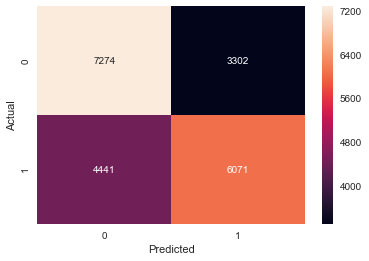

In [80]:
y_pred=lreg_clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


- I would want a model which has a lower proportion of readmitted people predicted as not readmitted: a critical metric for hospitals and insurance agencies both from a financial and preemptive healthcare perspective.
- type-2 errors has to be reduced, which reflects as a better recall for our model. 

### Decision Tree

In [81]:
# Finding best parameters for the decision tree to fit the model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=10)
param_grid = {'max_depth': [5,6,7, 8,10,12,15, 20, 50, 100]}

grid_search = GridSearchCV(dt_clf, param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 15}

In [82]:
# Fitting the model on best parameters and storing the results
dt_clf = DecisionTreeClassifier(max_depth = 15)
dt_clf.fit(X_train,y_train)
y_dt_clf = dt_clf.predict(X_test)
train_precision_score=precision_score(y_train,dt_clf.predict(X_train))
test_precision_score=precision_score(y_test,dt_clf.predict(X_test))
f1_score_train=f1_score(y_train, dt_clf.predict(X_train))
f1_score_test=f1_score(y_test, dt_clf.predict(X_test))
train_recall_score=recall_score(y_train,dt_clf.predict(X_train))
test_recall_score=recall_score(y_test,dt_clf.predict(X_test))
f_beta_score_train=precision_recall_fscore_support(y_train,dt_clf.predict(X_train), beta=1.0, labels=[0,1], pos_label=1, average='weighted', warn_for=('precision', 'recall', 'f-score'), sample_weight=None)[2]
f_beta_score_test=precision_recall_fscore_support(y_test,dt_clf.predict(X_test), beta=1.0, labels=[0,1], pos_label=1, average='weighted', warn_for=('precision', 'recall', 'f-score'), sample_weight=None)[2]
results = results.append(pd.Series({'model':'Decision Tree','f1_score_train':f1_score_train,'f1_score_test':f1_score_test,'train_precision_score':train_precision_score,'train_recall_score':train_recall_score,
                                    'test_recall_score':test_recall_score,'test_precision_score':test_precision_score,'f_beta_score_train':f_beta_score_train,'f_beta_score_test':f_beta_score_test})
                         ,ignore_index=True )
results

,model,f1_score_train,f1_score_test,train_precision_score,test_precision_score,train_recall_score,test_recall_score,f_beta_score_train,f_beta_score_test
0,Logistic Regression,0.612774,0.610611,0.654725,0.647712,0.575876,0.577530,0.634505,0.631689
1,Decision Tree,0.949669,0.926408,0.996745,0.974085,0.906840,0.883181,0.951806,0.929893


Text(34.0, 0.5, 'Actual')

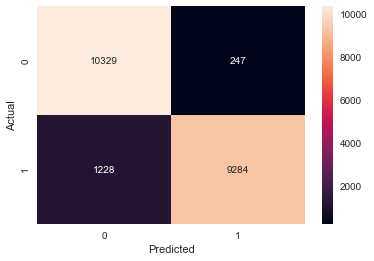

In [83]:
y_pred=dt_clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


- Decision Tree as expected got way better results, recall score has improved significantly, we have very few False Negatives now

### Random Forest

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Finding best parameters for Random Forest Classifier
param_grid = {"max_depth": [3, 5, 6,8],
              "max_features": sp_randint(1, 25),
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 20),
              "bootstrap": [True, False]}
random_search = RandomizedSearchCV(RandomForestClassifier(n_estimators=1000), param_distributions=param_grid,
                                   n_iter=20, random_state=0,n_jobs=-1, return_train_score=True)
random_search.fit(X_train, y_train)
random_search.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 18,
 'min_samples_leaf': 15,
 'min_samples_split': 9}

In [85]:
# Fitting the model on best parameters and storing the results
rf_clf = RandomForestClassifier(bootstrap=False,max_depth=6,max_features=16,min_samples_leaf=16,min_samples_split=2)
rf_clf.fit(X_train,y_train)
y_rf_clf = rf_clf.predict(X_test)
train_precision_score=precision_score(y_train,rf_clf.predict(X_train))
test_precision_score=precision_score(y_test,rf_clf.predict(X_test))
f1_score_train=f1_score(y_train, rf_clf.predict(X_train))
f1_score_test=f1_score(y_test, rf_clf.predict(X_test))
train_recall_score=recall_score(y_train,rf_clf.predict(X_train))
test_recall_score=recall_score(y_test,rf_clf.predict(X_test))
f_beta_score_train=precision_recall_fscore_support(y_train,rf_clf.predict(X_train), beta=1.0, labels=[0,1], pos_label=1, average='weighted', warn_for=('precision', 'recall', 'f-score'), sample_weight=None)[2]
f_beta_score_test=precision_recall_fscore_support(y_test,rf_clf.predict(X_test), beta=1.0, labels=[0,1], pos_label=1, average='weighted', warn_for=('precision', 'recall', 'f-score'), sample_weight=None)[2]
results = results.append(pd.Series({'model':'Random Forest','f1_score_train':f1_score_train,'f1_score_test':f1_score_test,'train_precision_score':train_precision_score,'train_recall_score':train_recall_score,
                                    'test_recall_score':test_recall_score,'test_precision_score':test_precision_score,'f_beta_score_train':f_beta_score_train,'f_beta_score_test':f_beta_score_test})
                         ,ignore_index=True )
results

,model,f1_score_train,f1_score_test,train_precision_score,test_precision_score,train_recall_score,test_recall_score,f_beta_score_train,f_beta_score_test
0,Logistic Regression,0.612774,0.610611,0.654725,0.647712,0.575876,0.577530,0.634505,0.631689
1,Decision Tree,0.949669,0.926408,0.996745,0.974085,0.906840,0.883181,0.951806,0.929893
2,Random Forest,0.905414,0.906767,0.992068,0.989428,0.832682,0.836853,0.912385,0.913686


Text(34.0, 0.5, 'Actual')

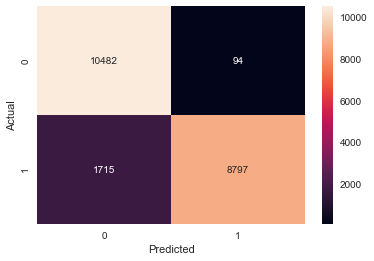

In [87]:
y_pred=rf_clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Comparing the predictive models

Text(0.5, 1.0, 'Train and Test f1_score')

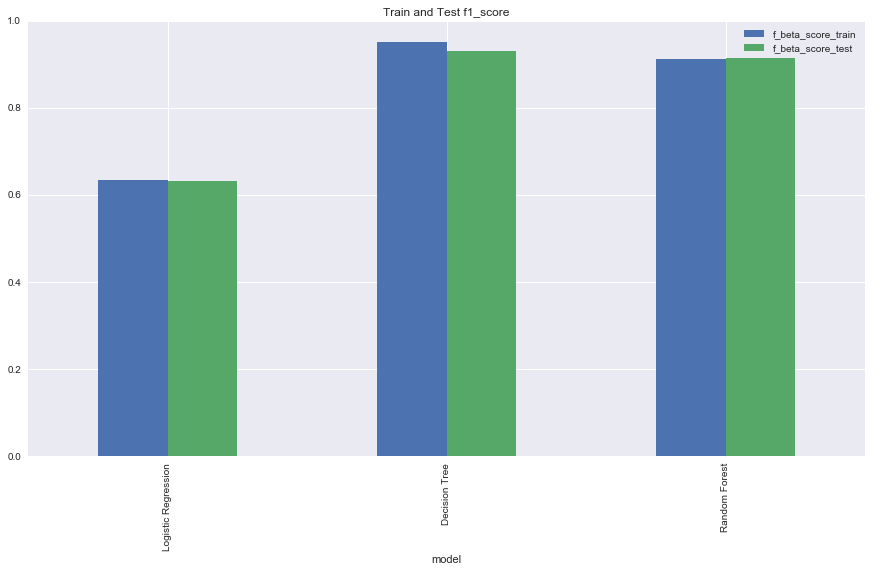

In [95]:
cols = ['model','f_beta_score_train','f_beta_score_test']
results[cols].set_index('model').plot(kind = 'bar', figsize=(15,8));
plt.title('Train and Test f1_score')

- Decision Tree is giving the best scores, but Random Forest seems to be more generalized and hence I will go ahead with this model for making predictions

### Plotting the Feature Importance as given by Random Forest

In [97]:
import plotly.graph_objs as go
import plotly.offline as py

features = train_input.columns.values

x, y = (list(x) for x in zip(*sorted(zip(rf_clf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)
fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)

Layout({
    'height': 2000,
    'margin': {'l': 300},
    'title': {'text': 'Barplot of Feature importances'},
    'width': 900,
    'yaxis': {'showgrid': False, 'showline': False, 'showticklabels': True}
})

In [98]:
py.plot(fig1, filename='plots')

'plots.html'

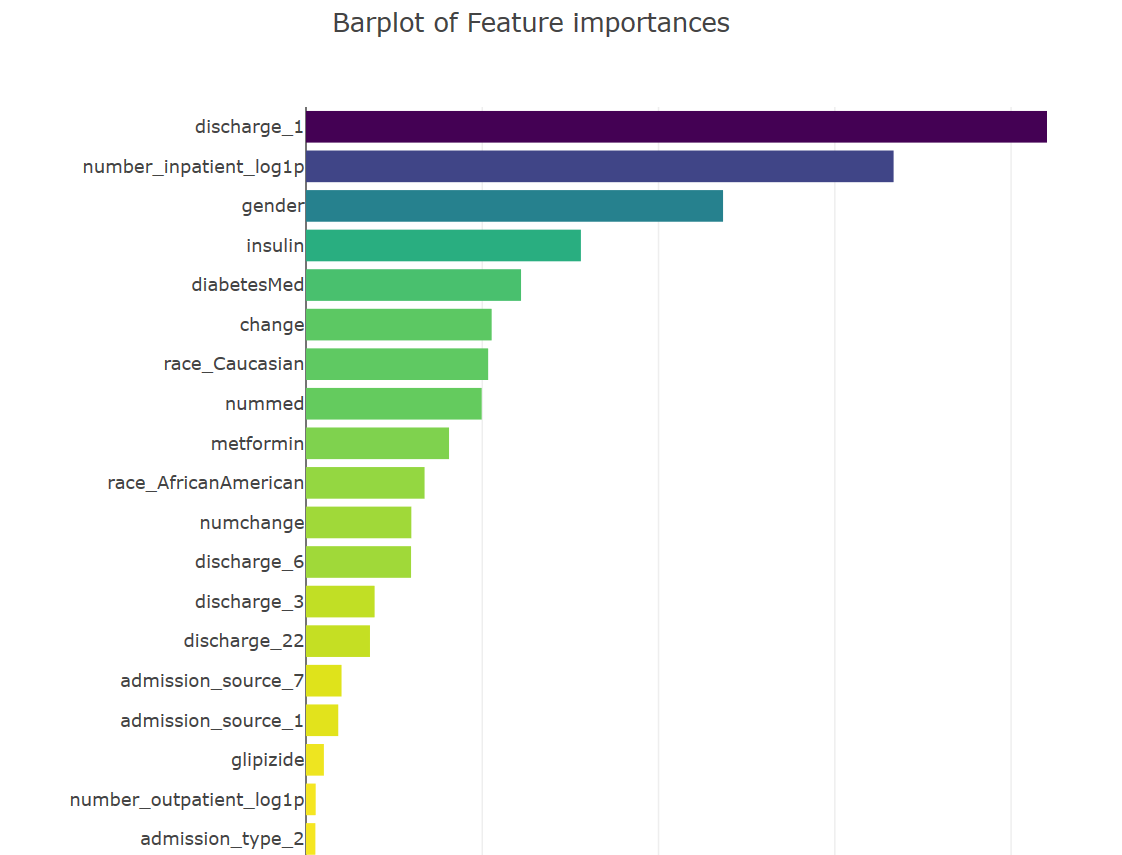

In [102]:
from IPython.display import Image
Image(filename='Capture.png',width=500, height=30)

## Making Predictions on Test Data


In [88]:
# Scaling the test data
X_test=scaler.transform(test)

In [99]:
# Predicting the test data
predictions=rf_clf.predict(X_test)

# Predicting the exact probabilities
predictions = rf_clf.predict_proba(X_test)

#### predictions has two columns, 1st column gives the probability of class 0, and 2nd column gives the probability of class 1
- Selecting the probability(y=1) and saving the results into a dataframe

In [116]:
predictions=predictions[:, [1]]
df=pd.DataFrame(predictions)
df.to_csv(r'C:\Users\nick2\Desktop\MS\LEARN\Assesments\Catalyst\results.csv')

*******************************************************************************************************************************